In [17]:
import os
import sys
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.preprocessing import OneHotEncoder

# Add the parent directory to path to import your modules
os.chdir("../..")
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from lib import *


Sparsity with L1 penalty: 56.73%
Test score with L1 penalty: 0.8300
Example run in 17.891 s


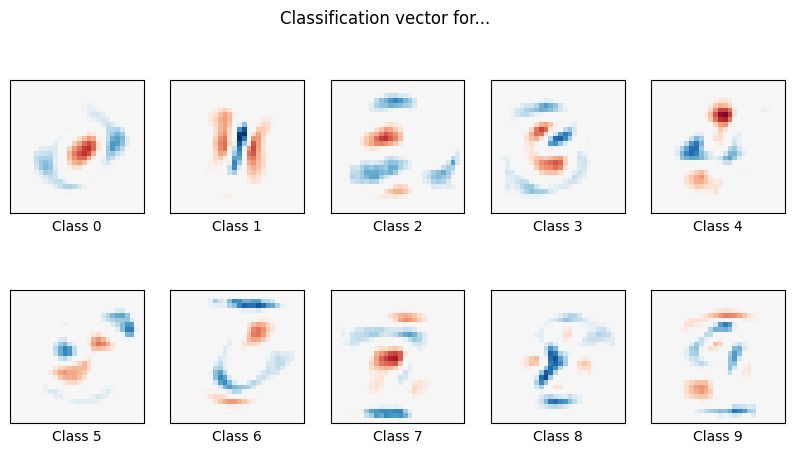

In [18]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [19]:
# Convert labels to one-hot encoding for neural network
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Create validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train_onehot, test_size=0.2, random_state=42
)

# Print dataset information
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Input features: {X_train.shape[1]}")
print(f"Output classes: {y_train_onehot.shape[1]}")

Training set: 4000 samples
Validation set: 1000 samples
Test set: 10000 samples
Input features: 784
Output classes: 10


### Pengaruh Regularisasi

In [28]:
# Define depth
depth_variations = [
    [784, 156, 156, 10]
]

# Define activation functions
activation_variations = [
    [ReLU(), ReLU(), Softmax()]
]

In [29]:
# Create Neural Network
my_network1 = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = CCE(),
    initialize_methods = UniformInitializer(seed=22)
)

my_network2 = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = CCE(),
    initialize_methods = UniformInitializer(seed=22)
)

my_network3 = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = CCE(),
    initialize_methods = UniformInitializer(seed=22)
)

In [30]:
# Create FFNN models
ffnn_no_reg = FFNN(my_network1)
ffnn_L1_reg = FFNN(my_network2, regularization_method="L1")
ffnn_L2_reg = FFNN(my_network3, regularization_method="L2")

In [31]:
# Train the model
no_reg_history = ffnn_no_reg.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

L1_history = ffnn_L1_reg.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

L2_history = ffnn_L2_reg.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

Epoch 1/20:   0%|          | 0/125 [00:00<?, ?it/s, loss=0.0554]

Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 144.34it/s, loss=2.2743]


Epoch 1/20 - 0.90s - loss: 2.2743 - val_loss: 2.2424


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 154.89it/s, loss=2.1812]


Epoch 2/20 - 0.84s - loss: 2.1812 - val_loss: 2.1176


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 154.89it/s, loss=1.9699]


Epoch 3/20 - 0.84s - loss: 1.9699 - val_loss: 1.8298


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 153.24it/s, loss=1.5715]


Epoch 4/20 - 0.85s - loss: 1.5715 - val_loss: 1.3988


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 139.82it/s, loss=1.1318]


Epoch 5/20 - 0.92s - loss: 1.1318 - val_loss: 1.0284


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 146.71it/s, loss=0.8205]


Epoch 6/20 - 0.89s - loss: 0.8205 - val_loss: 0.8011


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 150.97it/s, loss=0.6366]


Epoch 7/20 - 0.86s - loss: 0.6366 - val_loss: 0.6711


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 157.43it/s, loss=0.5227]


Epoch 8/20 - 0.82s - loss: 0.5227 - val_loss: 0.5861


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 125.13it/s, loss=0.4450]


Epoch 9/20 - 1.03s - loss: 0.4450 - val_loss: 0.5312


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 152.57it/s, loss=0.3894]


Epoch 10/20 - 0.85s - loss: 0.3894 - val_loss: 0.4939


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 144.51it/s, loss=0.3477]


Epoch 11/20 - 0.90s - loss: 0.3477 - val_loss: 0.4647


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 161.92it/s, loss=0.3153]


Epoch 12/20 - 0.80s - loss: 0.3153 - val_loss: 0.4436


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 130.74it/s, loss=0.2895]


Epoch 13/20 - 0.98s - loss: 0.2895 - val_loss: 0.4269


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 172.02it/s, loss=0.2675]


Epoch 14/20 - 0.75s - loss: 0.2675 - val_loss: 0.4151


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 161.08it/s, loss=0.2491]


Epoch 15/20 - 0.80s - loss: 0.2491 - val_loss: 0.4031


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 157.94it/s, loss=0.2331]


Epoch 16/20 - 0.81s - loss: 0.2331 - val_loss: 0.3942


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 157.23it/s, loss=0.2182]


Epoch 17/20 - 0.82s - loss: 0.2182 - val_loss: 0.3835


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 150.60it/s, loss=0.2048]


Epoch 18/20 - 0.86s - loss: 0.2048 - val_loss: 0.3768


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 146.89it/s, loss=0.1928]


Epoch 19/20 - 0.88s - loss: 0.1928 - val_loss: 0.3710


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 158.03it/s, loss=0.1809]


Epoch 20/20 - 0.82s - loss: 0.1809 - val_loss: 0.3684


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 139.33it/s, loss=0.8447]


Epoch 1/20 - 0.92s - loss: 0.8447 - val_loss: 0.6047


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 157.18it/s, loss=0.4024]


Epoch 2/20 - 0.82s - loss: 0.4024 - val_loss: 0.4614


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 155.67it/s, loss=0.4595]


Epoch 3/20 - 0.83s - loss: 0.4595 - val_loss: 0.8913


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 165.04it/s, loss=4.0623]


Epoch 4/20 - 0.78s - loss: 4.0623 - val_loss: 23.3427


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 154.14it/s, loss=30.8092]


Epoch 5/20 - 0.84s - loss: 30.8092 - val_loss: 31.2231


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 148.41it/s, loss=31.3008]


Epoch 6/20 - 0.90s - loss: 31.3008 - val_loss: 31.0807


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 155.00it/s, loss=31.2835]


Epoch 7/20 - 0.84s - loss: 31.2835 - val_loss: 31.0849


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 160.35it/s, loss=31.1581]


Epoch 8/20 - 0.81s - loss: 31.1581 - val_loss: 30.7740


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 154.55it/s, loss=30.9813]


Epoch 9/20 - 0.84s - loss: 30.9813 - val_loss: 30.7740


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 154.43it/s, loss=30.9813]


Epoch 10/20 - 0.84s - loss: 30.9813 - val_loss: 30.7740


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 152.99it/s, loss=30.9813]


Epoch 11/20 - 0.85s - loss: 30.9813 - val_loss: 30.7740


Epoch 12/20: 100%|██████████| 125/125 [00:01<00:00, 109.75it/s, loss=30.9813]


Epoch 12/20 - 1.17s - loss: 30.9813 - val_loss: 30.7740


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 128.73it/s, loss=30.9813]


Epoch 13/20 - 1.01s - loss: 30.9813 - val_loss: 30.7740


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 133.98it/s, loss=30.9813]


Epoch 14/20 - 0.97s - loss: 30.9813 - val_loss: 30.7740


Epoch 15/20: 100%|██████████| 125/125 [00:01<00:00, 113.74it/s, loss=30.9813]


Epoch 15/20 - 1.13s - loss: 30.9813 - val_loss: 30.7740


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 133.55it/s, loss=30.9813]


Epoch 16/20 - 0.97s - loss: 30.9813 - val_loss: 30.7740


Epoch 17/20: 100%|██████████| 125/125 [00:01<00:00, 121.06it/s, loss=30.9813]


Epoch 17/20 - 1.09s - loss: 30.9813 - val_loss: 30.7740


Epoch 18/20: 100%|██████████| 125/125 [00:01<00:00, 123.18it/s, loss=30.9813]


Epoch 18/20 - 1.05s - loss: 30.9813 - val_loss: 30.7740


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 125.88it/s, loss=30.9813]


Epoch 19/20 - 1.05s - loss: 30.9813 - val_loss: 30.7740


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 137.51it/s, loss=30.9813]


Epoch 20/20 - 0.94s - loss: 30.9813 - val_loss: 30.7740


Epoch 1/20: 100%|██████████| 125/125 [00:01<00:00, 122.12it/s, loss=2.2657]


Epoch 1/20 - 1.05s - loss: 2.2657 - val_loss: 2.2214


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 137.51it/s, loss=2.1215]


Epoch 2/20 - 0.94s - loss: 2.1215 - val_loss: 2.0027


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 140.61it/s, loss=1.7403]


Epoch 3/20 - 0.92s - loss: 1.7403 - val_loss: 1.5053


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 147.93it/s, loss=1.1748]


Epoch 4/20 - 0.88s - loss: 1.1748 - val_loss: 1.0113


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 126.90it/s, loss=0.7722]


Epoch 5/20 - 1.02s - loss: 0.7722 - val_loss: 0.7337


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 146.54it/s, loss=0.5642]


Epoch 6/20 - 0.88s - loss: 0.5642 - val_loss: 0.5985


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 138.89it/s, loss=0.4447]


Epoch 7/20 - 0.93s - loss: 0.4447 - val_loss: 0.5206


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 132.98it/s, loss=0.3700]


Epoch 8/20 - 0.98s - loss: 0.3700 - val_loss: 0.4734


Epoch 9/20: 100%|██████████| 125/125 [00:01<00:00, 118.26it/s, loss=0.3190]


Epoch 9/20 - 1.09s - loss: 0.3190 - val_loss: 0.4432


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 133.55it/s, loss=0.2817]


Epoch 10/20 - 0.97s - loss: 0.2817 - val_loss: 0.4210


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 141.40it/s, loss=0.2526]


Epoch 11/20 - 0.91s - loss: 0.2526 - val_loss: 0.3984


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 145.18it/s, loss=0.2278]


Epoch 12/20 - 0.89s - loss: 0.2278 - val_loss: 0.3838


Epoch 13/20: 100%|██████████| 125/125 [00:01<00:00, 123.27it/s, loss=0.2078]


Epoch 13/20 - 1.05s - loss: 0.2078 - val_loss: 0.3755


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 136.91it/s, loss=0.1884]


Epoch 14/20 - 0.94s - loss: 0.1884 - val_loss: 0.3635


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 131.30it/s, loss=0.1724]


Epoch 15/20 - 0.98s - loss: 0.1724 - val_loss: 0.3588


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 139.66it/s, loss=0.1574]


Epoch 16/20 - 0.92s - loss: 0.1574 - val_loss: 0.3524


Epoch 17/20: 100%|██████████| 125/125 [00:01<00:00, 105.84it/s, loss=0.1447]


Epoch 17/20 - 1.21s - loss: 0.1447 - val_loss: 0.3457


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 129.40it/s, loss=0.1325]


Epoch 18/20 - 1.01s - loss: 0.1325 - val_loss: 0.3439


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 133.26it/s, loss=0.1218]


Epoch 19/20 - 0.98s - loss: 0.1218 - val_loss: 0.3382


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 137.57it/s, loss=0.1117]


Epoch 20/20 - 0.94s - loss: 0.1117 - val_loss: 0.3366


In [ ]:
# Evaluate the model
evaluate_model(ffnn_no_reg, X_test, y_test_onehot)

evaluate_model(ffnn_L1_reg, X_test, y_test_onehot)

evaluate_model(ffnn_L2_reg, X_test, y_test_onehot)


----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.1039000000
Precision (macro)    0.0103900000
Recall (macro)       0.1000000000
F1 Score (macro)     0.0188241689
------------------------------


d:\GitHub\Tugas-Besar-I-ML\.env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 0.1039,
 'precision': 0.01039,
 'recall': 0.1,
 'f1': 0.018824168855874627}

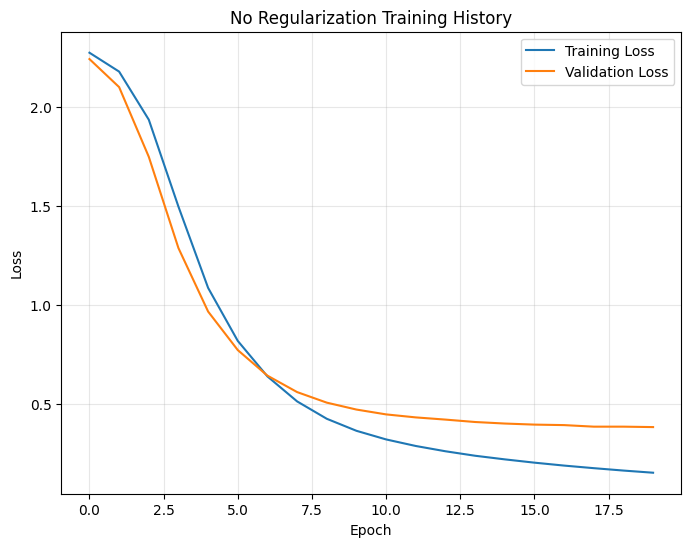

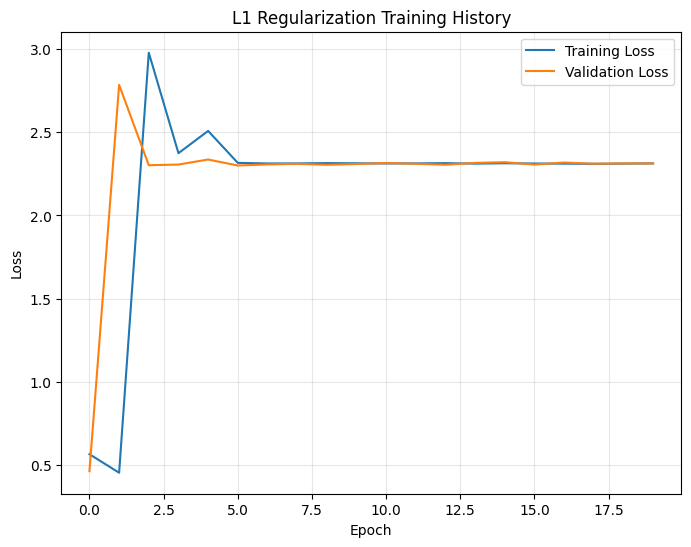

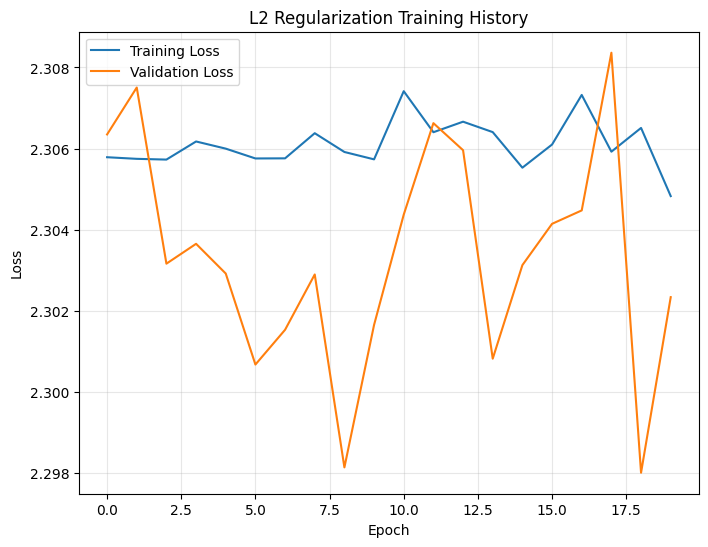

In [13]:
# Plot the training history
plot_training_loss(no_reg_history, "No Regularization Training History")

plot_training_loss(L1_history, "L1 Regularization Training History")

plot_training_loss(L2_history, "L2 Regularization Training History")

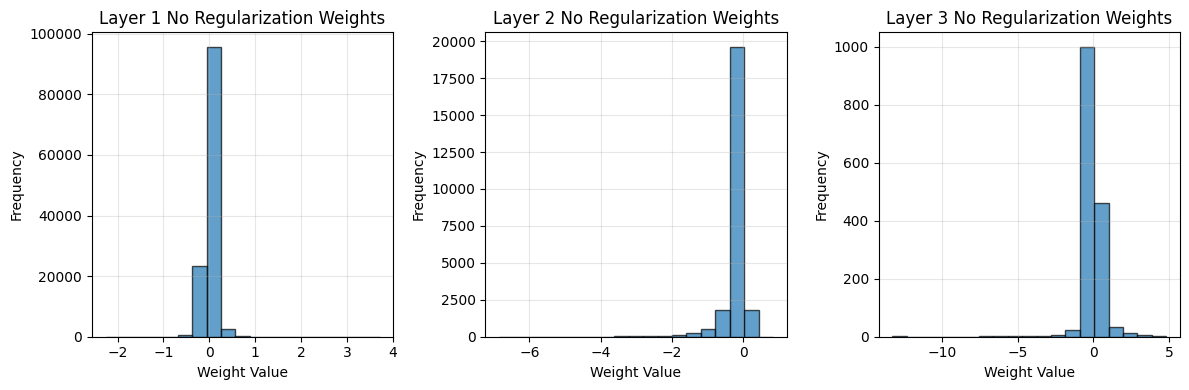

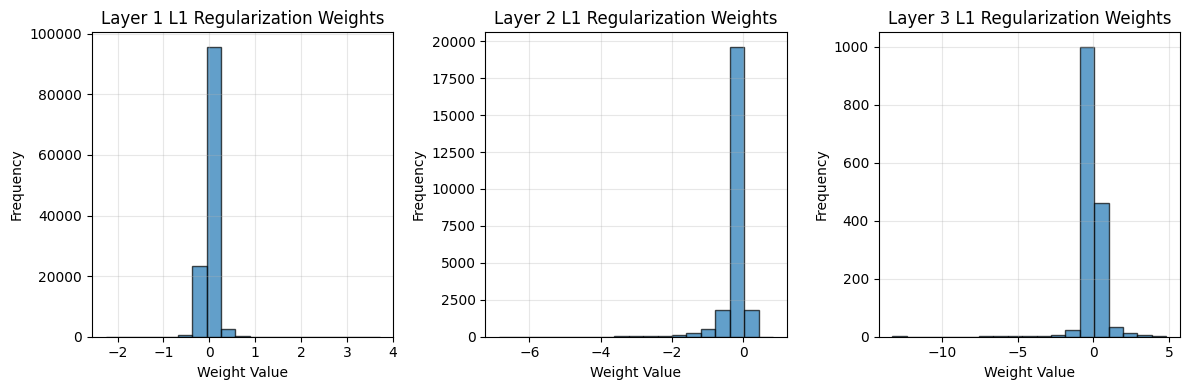

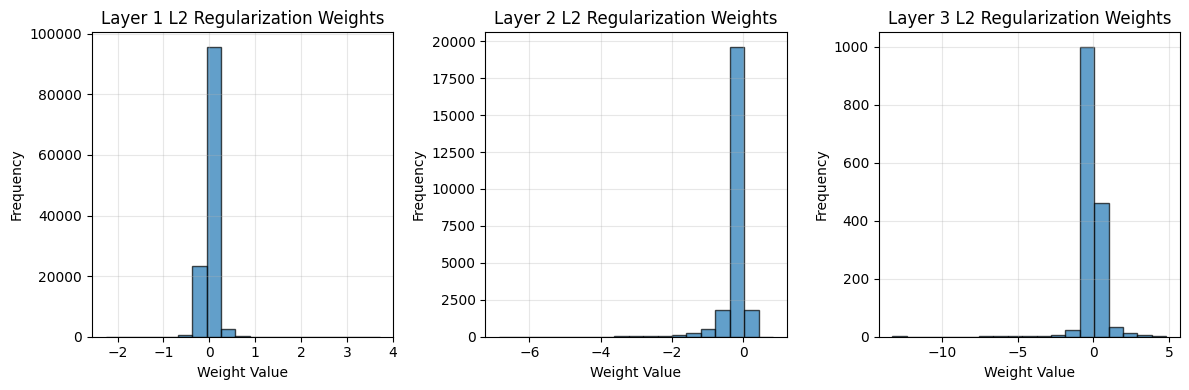

In [14]:
# Plot Weights
ffnn_no_reg.plot_weights(title="No Regularization Weights")

ffnn_L1_reg.plot_weights(title="L1 Regularization Weights")

ffnn_L2_reg.plot_weights(title="L2 Regularization Weights")

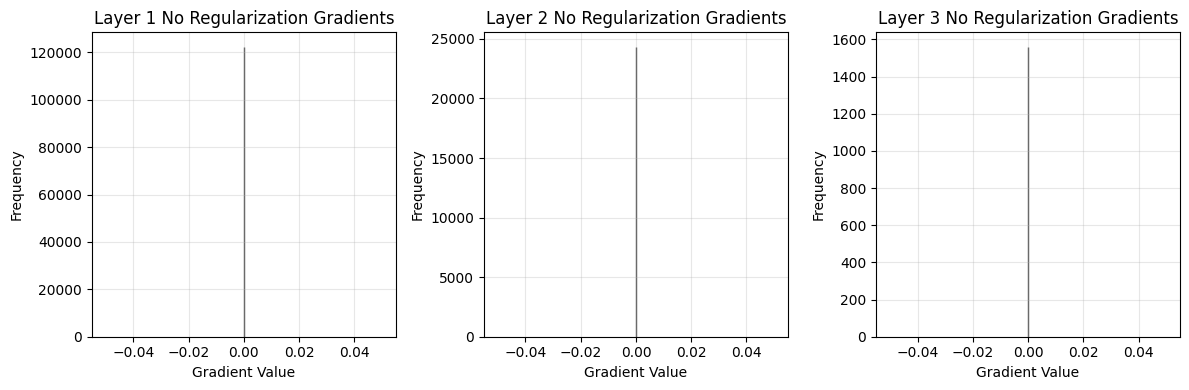

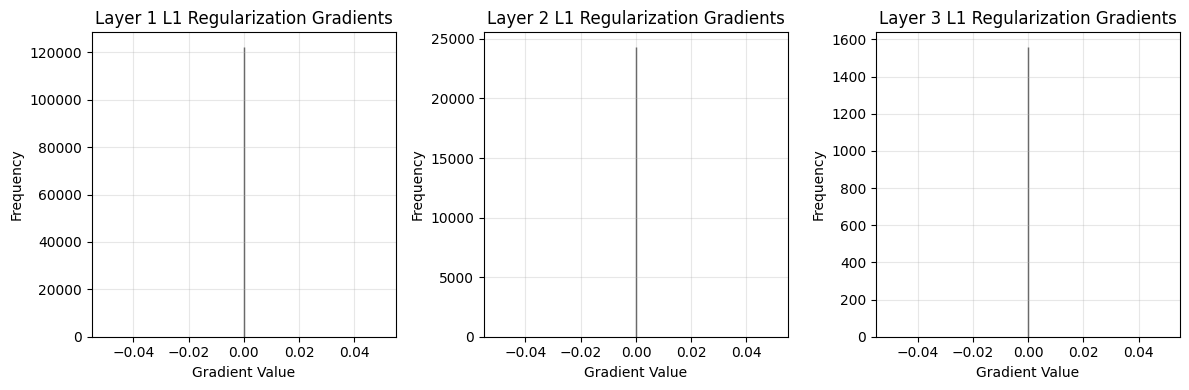

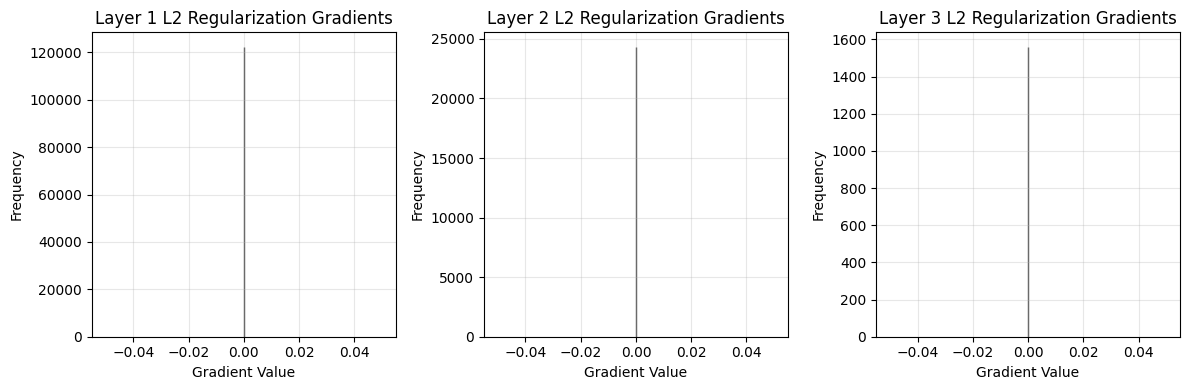

In [15]:
# Plot Gradient of Weights
ffnn_no_reg.plot_gradients(title="No Regularization Gradients")

ffnn_L1_reg.plot_gradients(title="L1 Regularization Gradients")

ffnn_L2_reg.plot_gradients(title="L2 Regularization Gradients")